In [5]:
import matplotlib.pyplot as plt
import csv
import statistics as stats
import json
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.rcParams.update({'font.size': 22})

In [6]:
containers = ["docker", "podman", "singularity", "singularity_sif"]
measurements = ["startup_singular", "complete_singular", "startup_concurrent", "stop_concurrent", "memory_active"]
container_stats = {}
for container in containers:
    container_stats[container] = {}

### Startup time / singular

Start a container a number of time, one at a time
- startup time: time between the container start command is issued and the reception of the packet
- complete time: time between the container start command is issued and the when the command returns

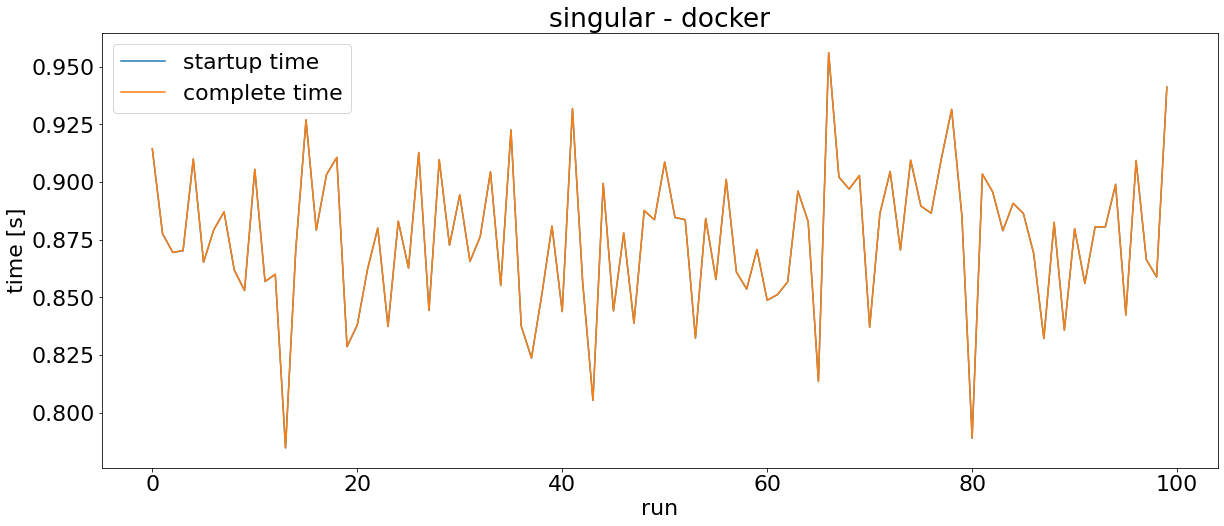

Number of samples: 100
Start: {
  "min": 0.7846279144287109,
  "mean": 0.8752856469154358,
  "max": 0.9560732841491699,
  "std": 0.031247851981158044
}
Complete: {
  "min": 0.7846994400024414,
  "mean": 0.8753624868392944,
  "max": 0.9561240673065186,
  "std": 0.031245952333621936
}


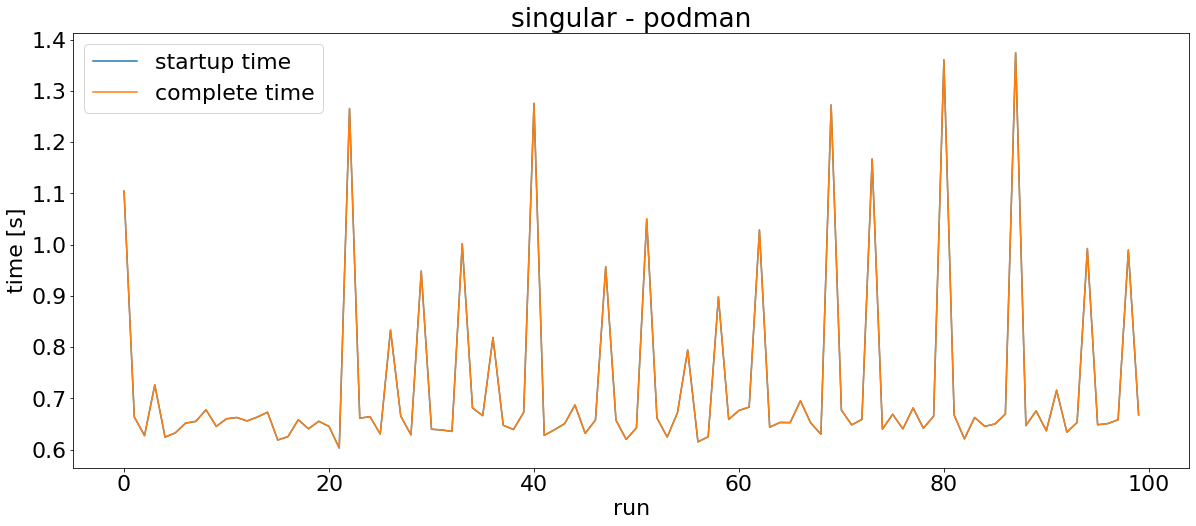

Number of samples: 100
Start: {
  "min": 0.6028895378112793,
  "mean": 0.7262953662872315,
  "max": 1.3742725849151611,
  "std": 0.1770017839359403
}
Complete: {
  "min": 0.6029479503631592,
  "mean": 0.726372263431549,
  "max": 1.3743493556976318,
  "std": 0.17700197780822907
}


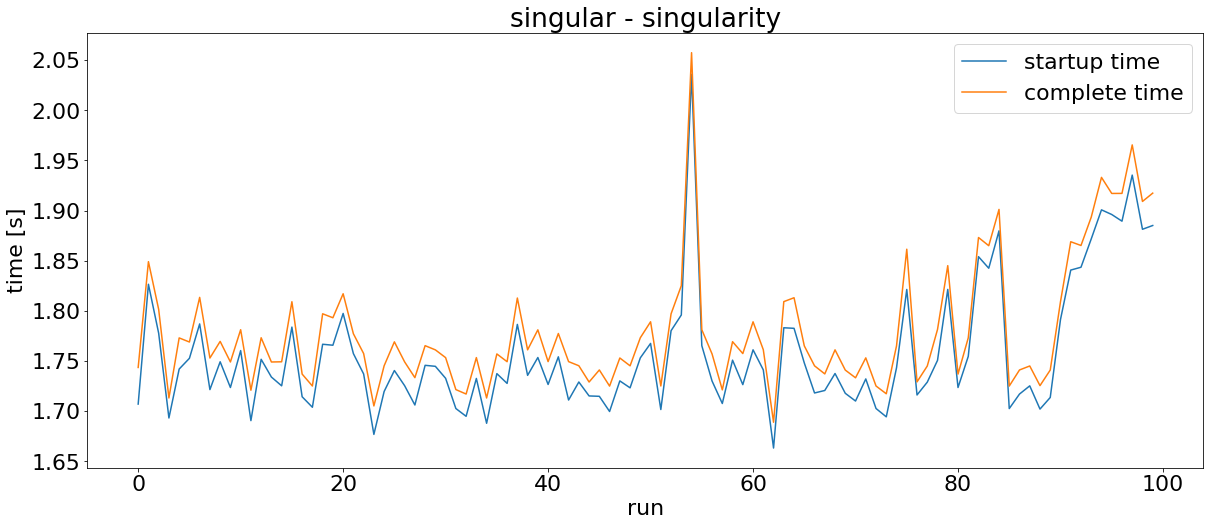

Number of samples: 100
Start: {
  "min": 1.6632678508758545,
  "mean": 1.7568339967727662,
  "max": 2.035707473754883,
  "std": 0.06236598974085164
}
Complete: {
  "min": 1.6889803409576416,
  "mean": 1.7802749371528626,
  "max": 2.0573503971099854,
  "std": 0.06329013771805218
}


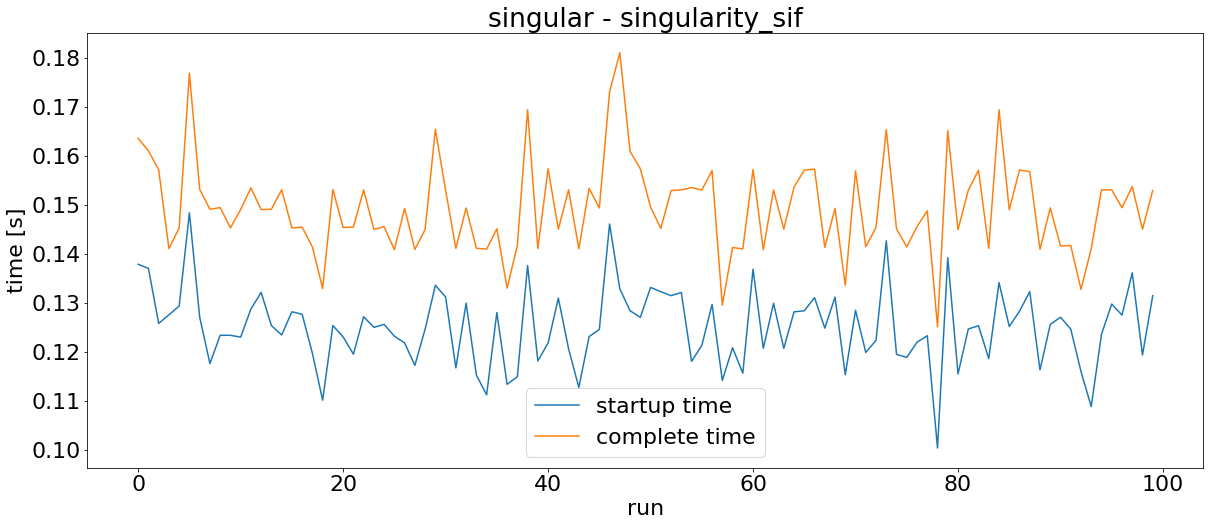

Number of samples: 100
Start: {
  "min": 0.10041618347167969,
  "mean": 0.12513880252838136,
  "max": 0.14842438697814941,
  "std": 0.007891612798740871
}
Complete: {
  "min": 0.12513947486877441,
  "mean": 0.14949525594711305,
  "max": 0.18109989166259766,
  "std": 0.009566128133685027
}


In [7]:
for container in containers:
    start_x = []
    start_y = []

    complete_y = []

    with open("singular_" + container + ".csv", "r") as csvfile:
        rows = csv.DictReader(csvfile, delimiter=',')
        for i, row in enumerate(rows):
            start_x.append(i)
            start_y.append(float(row["start_time"]))
            complete_y.append(float(row["complete_time"]))

    plt.plot(start_x, start_y, label='startup time')
    plt.plot(start_x, complete_y, label='complete time')
    plt.xlabel('run')
    plt.ylabel('time [s]')
    plt.title('singular - ' + container)
    plt.legend()
    plt.show()
    
    container_stats[container]["startup_singular"] = {"min": min(start_y),
                                                      "mean": stats.mean(start_y),
                                                      "max": max(start_y),
                                                      "std": stats.stdev(start_y)}
    container_stats[container]["complete_singular"] = {"min": min(complete_y),
                                                       "mean": stats.mean(complete_y),
                                                       "max": max(complete_y),
                                                       "std": stats.stdev(complete_y)}
    
    print("Number of samples: %d" % len(start_y))
    print('Start: ' + json.dumps(container_stats[container]["startup_singular"], indent=2))
    print('Complete: ' + json.dumps(container_stats[container]["complete_singular"], indent=2))

### Startup time / concurrent
Start a given number of containers one after another one
- startup time: time between the container start command is issued and the when the command returns
- stop time: time between the container stop command is issued and the when the command returns
- memory consumption: the memory used during the test

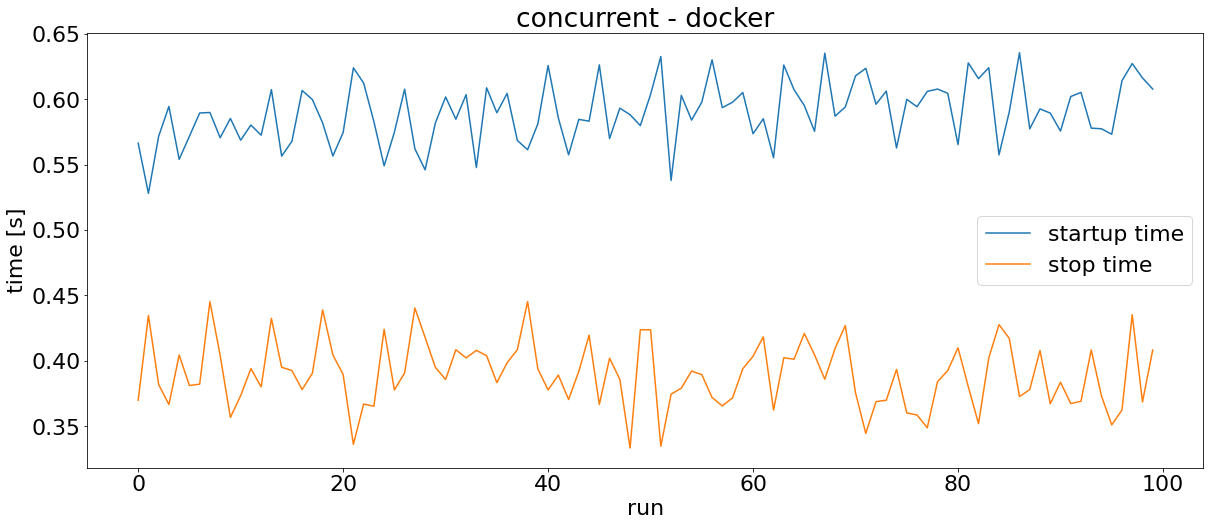

Max concurrent: 100
Start: {
  "min": 0.5280413627624512,
  "mean": 0.5897328019142151,
  "max": 0.6355907917022705,
  "std": 0.023317474241860644
}
Stop: {
  "min": 0.3333404064178467,
  "mean": 0.38980130434036253,
  "max": 0.4453129768371582,
  "std": 0.02507498412432514
}


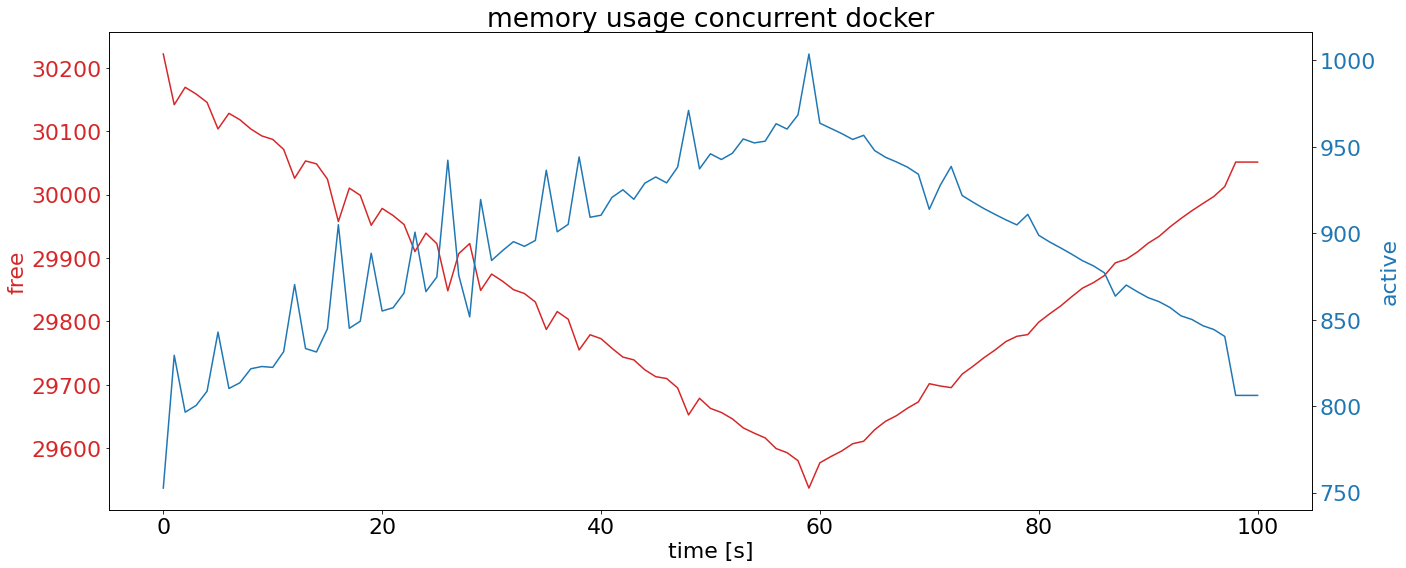

Memory active: {
  "min": 752.6,
  "mean": 892.0435643564357,
  "max": 1003.6,
  "std": 50.50979789276846,
  "consumption": 251.0
}


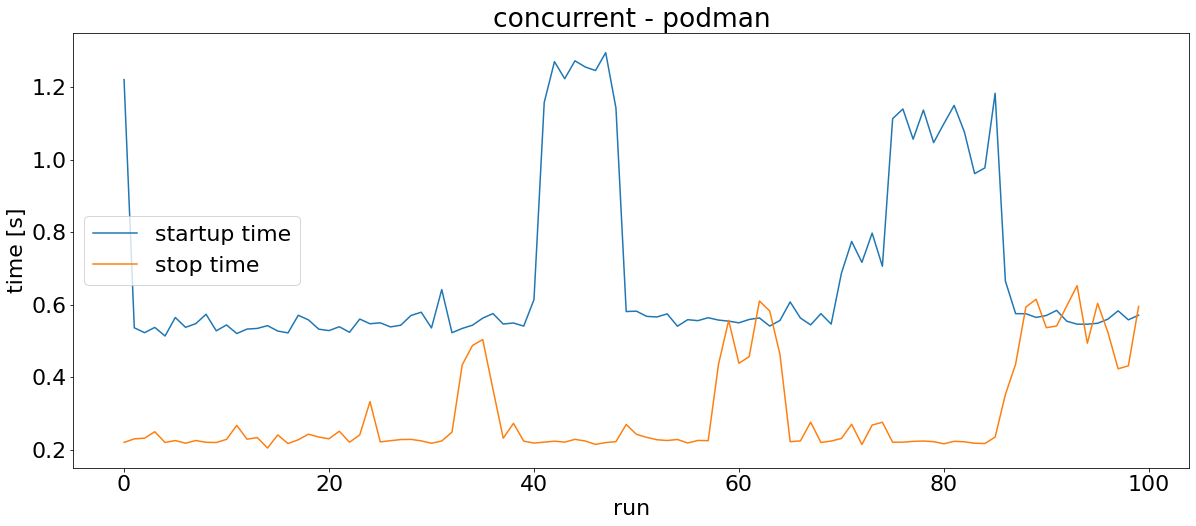

Max concurrent: 100
Start: {
  "min": 0.5134689807891846,
  "mean": 0.6838684630393982,
  "max": 1.2945408821105957,
  "std": 0.24278647712328863
}
Stop: {
  "min": 0.20456790924072266,
  "mean": 0.3008346462249756,
  "max": 0.6522049903869629,
  "std": 0.12875725150638714
}


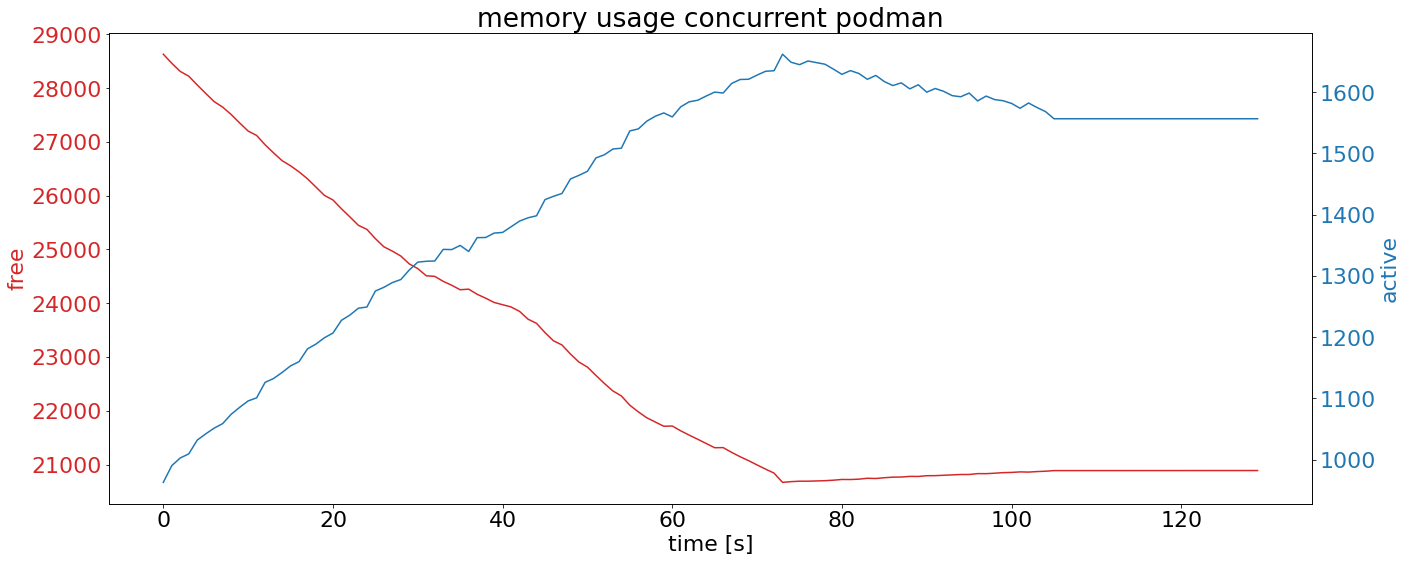

Memory active: {
  "min": 962.8,
  "mean": 1450.3753846153845,
  "max": 1661.9,
  "std": 191.14061874330073,
  "consumption": 699.1000000000001
}


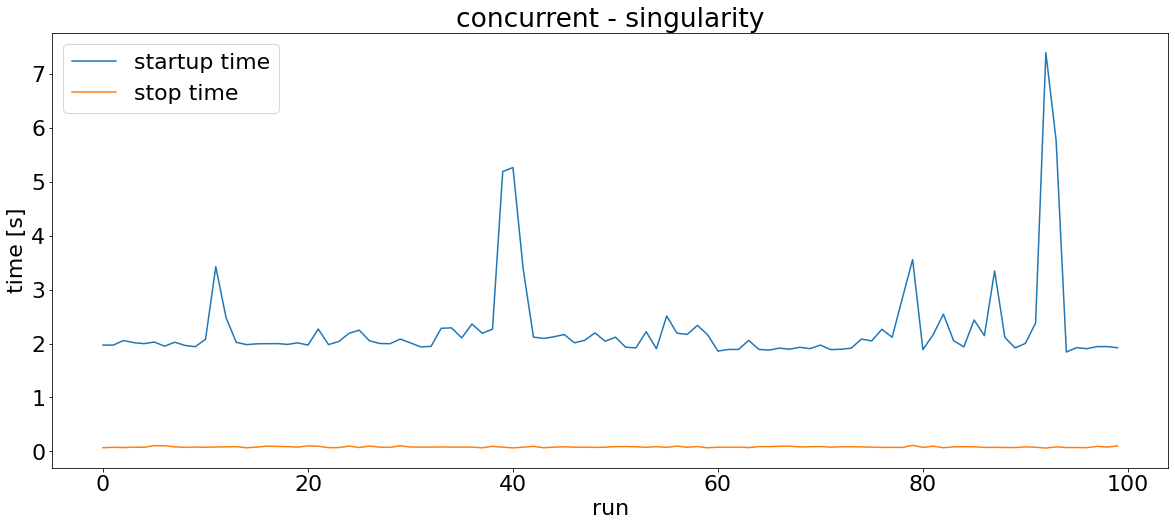

Max concurrent: 100
Start: {
  "min": 1.8420426845550537,
  "mean": 2.275256860256195,
  "max": 7.398545742034912,
  "std": 0.8291529521137517
}
Stop: {
  "min": 0.06053781509399414,
  "mean": 0.08007344722747803,
  "max": 0.11081814765930176,
  "std": 0.010238717045257714
}


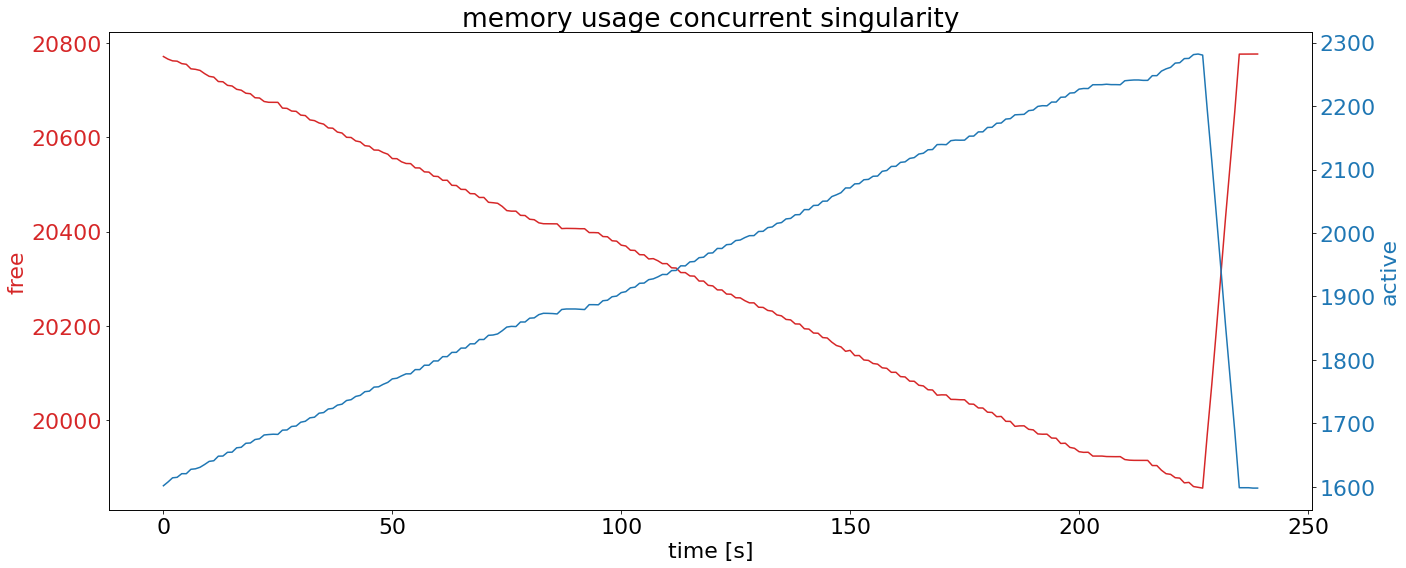

Memory active: {
  "min": 1598.1,
  "mean": 1948.215,
  "max": 2282.0,
  "std": 202.94636125862704,
  "consumption": 683.9000000000001
}


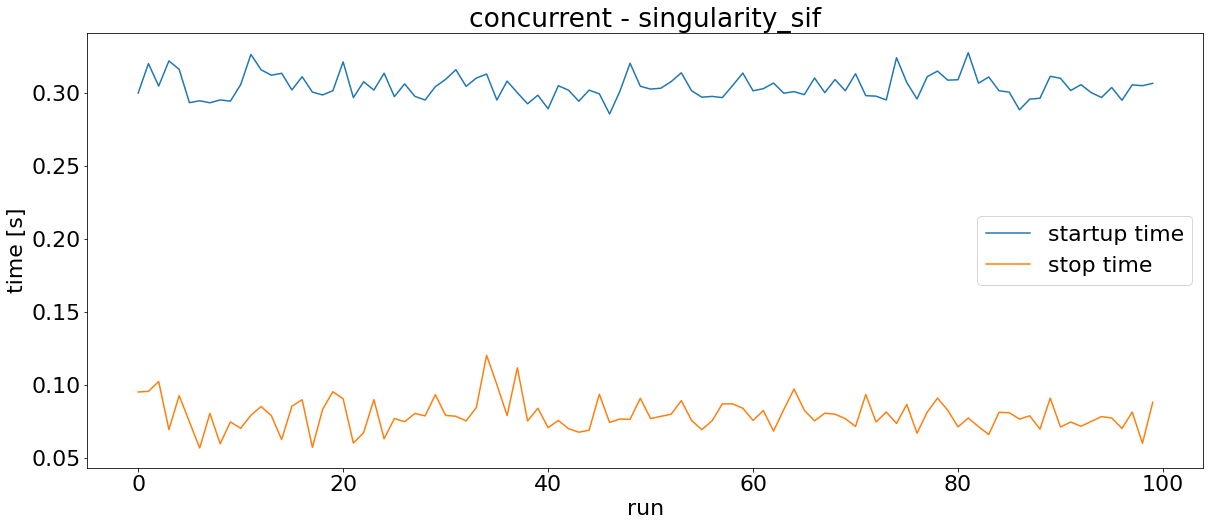

Max concurrent: 100
Start: {
  "min": 0.2857084274291992,
  "mean": 0.30440579652786254,
  "max": 0.3276855945587158,
  "std": 0.008386317135749947
}
Stop: {
  "min": 0.05690312385559082,
  "mean": 0.07950659990310668,
  "max": 0.12039375305175781,
  "std": 0.010854565849926119
}


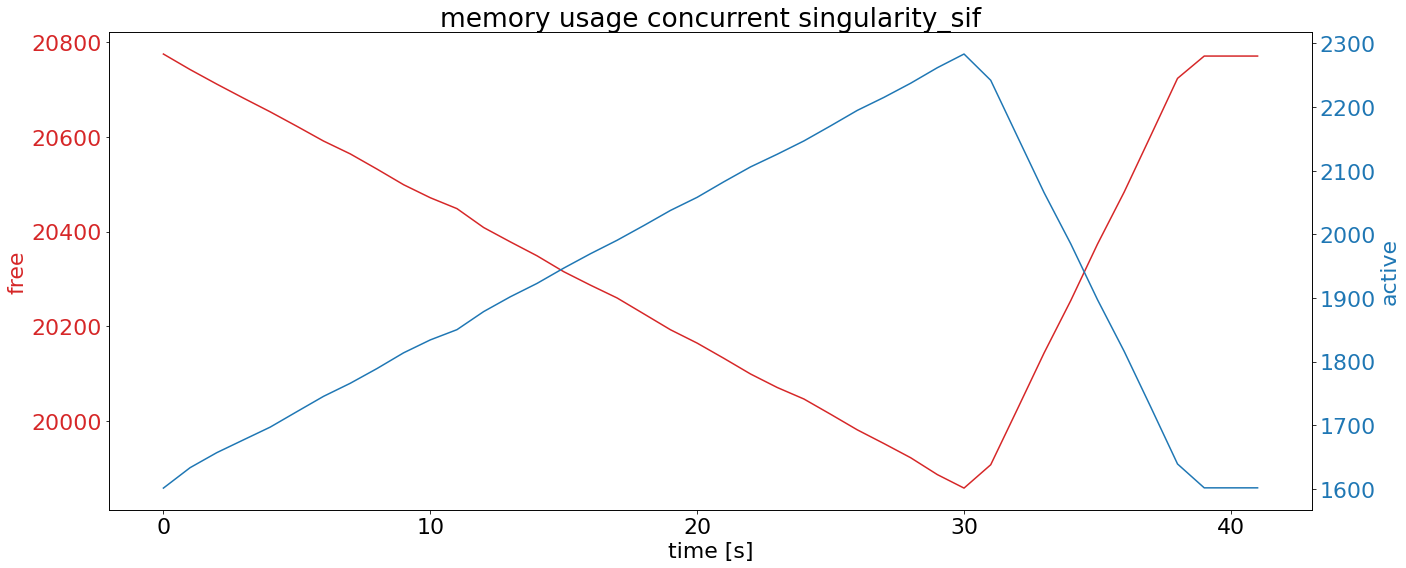

Memory active: {
  "min": 1601.1,
  "mean": 1920.4238095238095,
  "max": 2283.3,
  "std": 214.87958489499593,
  "consumption": 682.2000000000003
}


In [76]:
for container in containers:
    start_x = []
    start_y = []

    stop_x = []
    stop_y = []

    with open("concurrent_" + container + ".csv", "r") as csvfile:
        rows = csv.DictReader(csvfile, delimiter=',')
        start_c = 0
        stop_c = 0
        for i, row in enumerate(rows):
            if row["type"] == "start":
                start_x.append(start_c)
                start_y.append(float(row["complete_time"]))
                start_c += 1
            if row["type"] == "stop":
                stop_x.append(stop_c)
                stop_y.append(float(row["complete_time"]))
                stop_c += 1

    plt.plot(start_x, start_y, label='startup time')
    plt.plot(stop_x, stop_y, label='stop time')
    plt.xlabel('run')
    plt.ylabel('time [s]')
    plt.title('concurrent - ' + container)
    plt.legend()
    plt.show()
    
    print("Max concurrent: %d" % len(start_y))
    container_stats[container]["startup_concurrent"] = {"min": min(start_y),
                                                        "mean": stats.mean(start_y),
                                                        "max": max(start_y),
                                                        "std": stats.stdev(start_y)}
    container_stats[container]["stop_concurrent"] = {"min": min(stop_y),
                                                     "mean": stats.mean(stop_y),
                                                     "max": max(stop_y),
                                                     "std": stats.stdev(stop_y)}
    print('Start: ' + json.dumps(container_stats[container]["startup_concurrent"], indent=2))
    print('Stop: ' + json.dumps(container_stats[container]["stop_concurrent"], indent=2))

    # memory usage
    with open("nmon_concurrent_" + container + ".csv", "r") as csvfile:
        all_rows = csv.reader(csvfile, delimiter=',')
        m_rows = []
        for row in all_rows:
            if row[0] == "MEM" and row [2] != 'memtotal':
                m_rows.append(row)
        t = []
        mem_free = []
        mem_active = []
        for i, row in enumerate(m_rows):
            t.append(i)
            mem_free.append(float(row[6]))
            mem_active.append(float(row[12]))

    data1 = mem_free
    data2 = mem_active
    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('time [s]')
    ax1.set_ylabel('free', color=color)
    ax1.plot(t, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('active', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('memory usage concurrent ' + container)
    plt.show()
    
    container_stats[container]["memory_active"] = {"min": min(mem_active),
                                                   "mean": stats.mean(mem_active),
                                                   "max": max(mem_active),
                                                   "std": stats.stdev(mem_active),
                                                   "consumption": max(mem_active)-min(mem_active)}
    print('Memory active: ' + json.dumps(container_stats[container]["memory_active"], indent=2))

## Recap

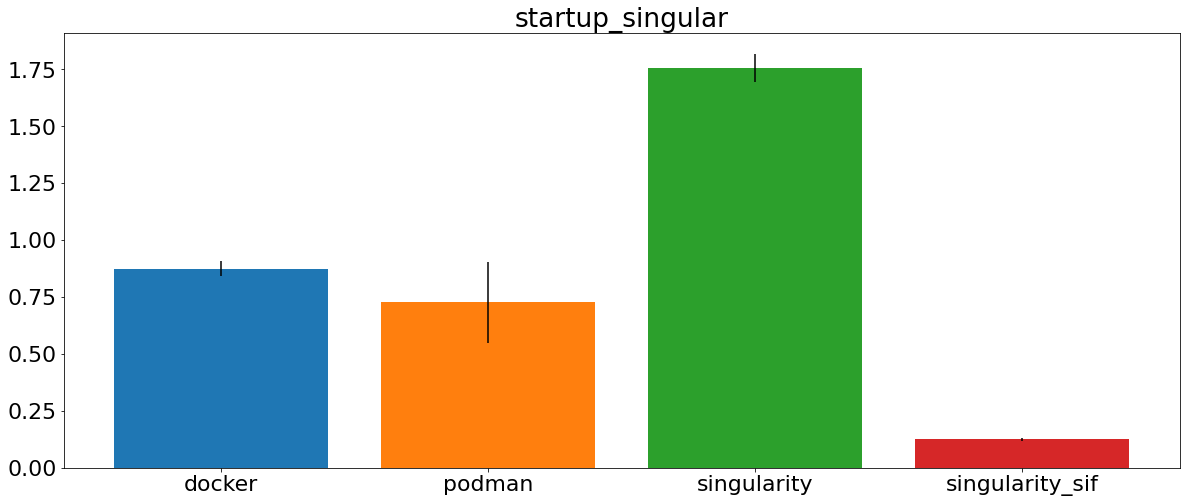

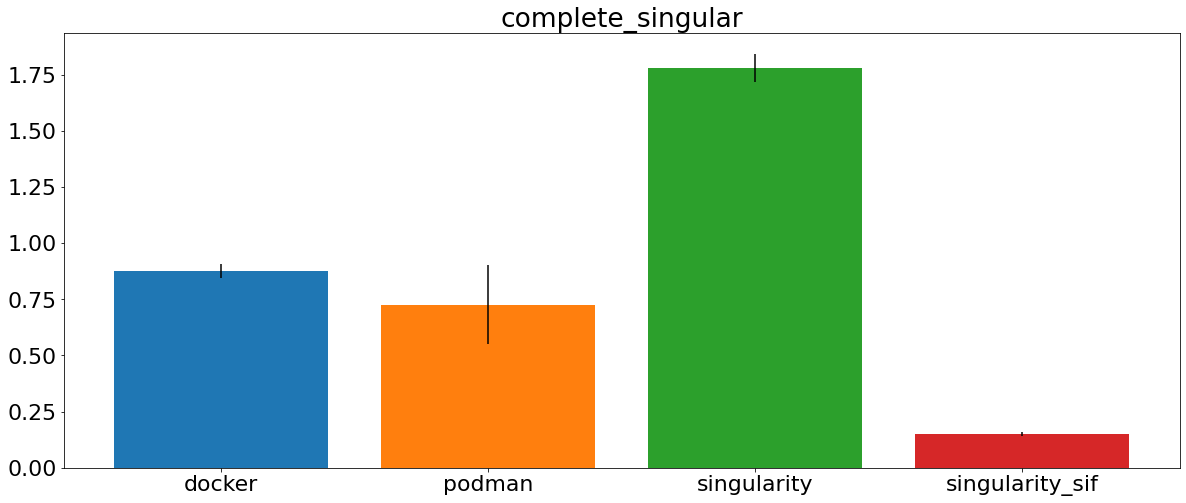

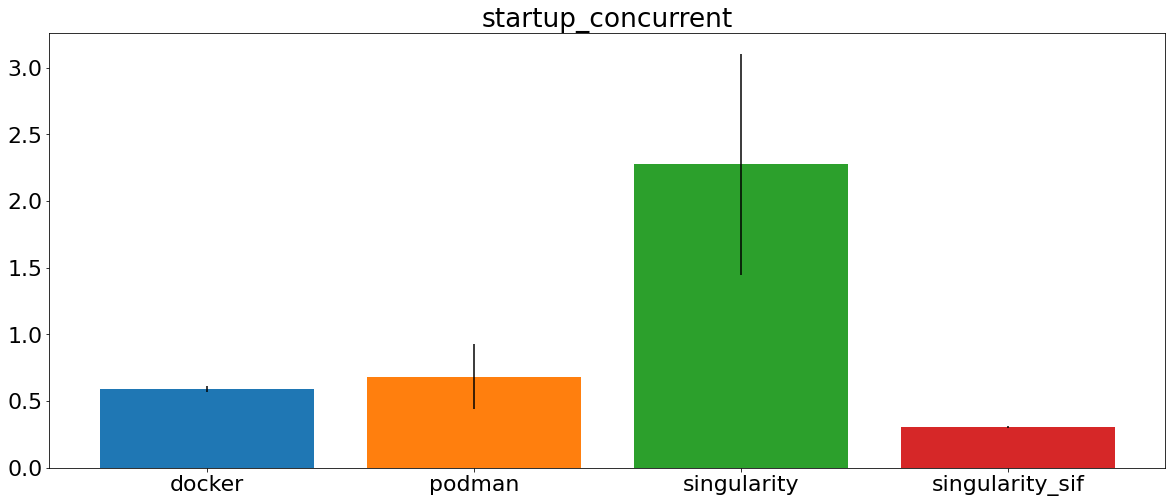

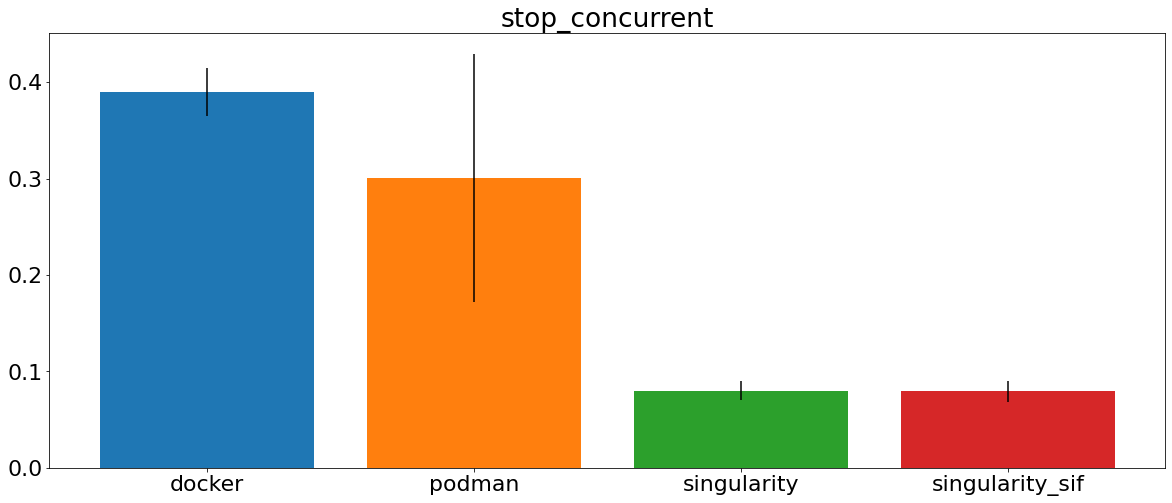

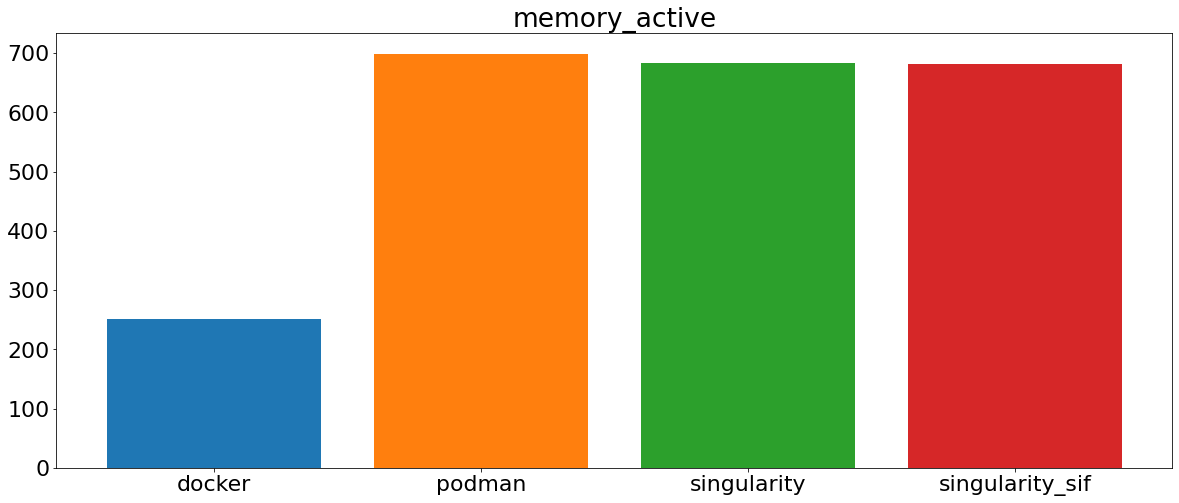

In [81]:
# print('container_stats: ' + json.dumps(container_stats, indent=2))

for measure in measurements:
    for i, container in enumerate(containers):
        if measure == "memory_active":
            pl = plt.bar(i, container_stats[container][measure]["consumption"])
        else:
            pl = plt.bar(i, container_stats[container][measure]["mean"],
                         yerr=container_stats[container][measure]["std"])
    index = [i for i in range(len(containers))]
    plt.title(measure)
    plt.xticks(index, containers)
    plt.show()